# Font-type Recognition with <font color=yellow>CNN / ConvNets : Convolutional Neural Networks</font> using [Keras](https://keras.io/)</font>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras logo" height="100" width="250"> 

---

<font size=4 >Summer Seminar:</font> <font size=4 color= orange>Practical Introduction to Deep Learning & Keras</font>

 <img src="https://pbs.twimg.com/profile_images/969243109208018946/w2GzDfiC_400x400.jpg" alt="IPTC" height="50" width="50"> 
 ## * [IPTC](https://iptc.upm.es/) and [MSTC](http://mstc.ssr.upm.es/big-data-track)
 
---
---


In [2]:
import keras

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

      
print('Keras version: ',keras.__version__)

Keras version:  2.2.4


## <font color= #00cc00>Next cells load the Font Type dataset:</font>


In [0]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

onehot= to_categorical(labels, num_classes=len(np.unique(labels)))

## Preparing Train/Test Data :
- ### Random Permutation! + split data into training / validation

In [0]:
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [5]:
train=train.reshape([-1,train.shape[1],train.shape[2],1])
test=test.reshape([-1,test.shape[1],test.shape[2],1])

print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 36, 36, 1) 
Test shape= (279, 36, 36, 1)


## Try CNN / ConvNet models in Keras (remember):

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.


## 1.   **Define your ConNet model**:

## ...a model similar as the one we used in TensorFlow...

In [6]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model = Sequential()

# input: 36x36 images with 1 channel -> (36, 36) tensors.
# this applies 4 convolution filters of size 5x5 each.
model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(36, 36,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


W0709 15:56:43.760535 139689364621184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 15:56:43.807904 139689364621184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 15:56:43.815555 139689364621184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 15:56:43.848643 139689364621184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0709 15:56:43.883994 139689364621184 deprecation_wrapp

## <font color=yellow> You can try other  ConvNet styles: i.e. VGG style

> Bloque con sangría


  
  [ConvNet Arquitectures](https://medium.com/@siddharthdas_32104/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
  
  **CNNs Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more …**

    The ImageNet project is a large visual database designed for use in visual object recognition software research. The ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes

In [0]:
'''model = Sequential()
# input: 36x36 images with 1 channel -> (36, 36) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(36, 36,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
'''

## 2.   **Compile your model**. Specify loss functions and optimizers

In [7]:
from keras.optimizers import SGD


model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

W0709 15:57:52.369450 139689364621184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 15:57:52.382251 139689364621184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 33,069
Trainable params: 33,069
Non-trainable params: 0
_________________________________________________________________


# 3.   **Fit your model**. Train the model using data.

In [12]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

W0709 15:59:57.040499 139689364621184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2511 samples, validate on 279 samples
Epoch 1/100
2511/2511 [==============================] - 6s 3ms/step - loss: 1.5952 - acc: 0.2378 - val_loss: 1.5371 - val_acc: 0.2652
Epoch 2/100
2511/2511 [==============================] - 0s 54us/step - loss: 1.4923 - acc: 0.3150 - val_loss: 1.3873 - val_acc: 0.3513
Epoch 3/100
2511/2511 [==============================] - 0s 57us/step - loss: 1.3666 - acc: 0.3967 - val_loss: 1.2218 - val_acc: 0.5018
Epoch 4/100
2511/2511 [==============================] - 0s 52us/step - loss: 1.2063 - acc: 0.4934 - val_loss: 1.0435 - val_acc: 0.5878
Epoch 5/100
2511/2511 [==============================] - 0s 51us/step - loss: 1.0867 - acc: 0.5368 - val_loss: 0.9717 - val_acc: 0.6057
Epoch 6/100
2511/2511 [==============================] - 0s 53us/step - loss: 1.0051 - acc: 0.5679 - val_loss: 0.8853 - val_acc: 0.6595
Epoch 7/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.9473 - acc: 0.5775 - val_loss: 0.8387 - val_acc: 0.6559
Ep

## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [13]:
# Check accuracy on train set

loss_train, accuracy_train = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

2511/2511 [==============================] - 0s 31us/step

Training Accuracy= 0.997610513739546
279/279 [==============================] - 0s 57us/step

Test Accuracy= 0.9605734743525051


In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Train Accuracy:  0.97
Test_Accuracy:  0.96


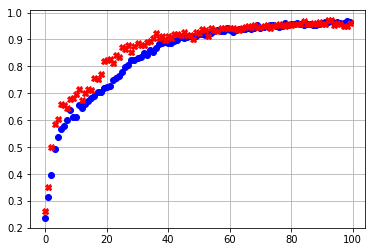

In [16]:
print('Train Accuracy: ',np.round(history.history['acc'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_acc'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['acc'],'bo')
plt.plot(history.history['val_acc'],'rX')
plt.grid()

# Get predictions / probabilities ...

In [17]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[7.8766112e-07 6.7865886e-03 4.8495163e-09 4.1593908e-04 9.9279672e-01]
 [6.2605934e-05 9.9991262e-01 1.4085857e-05 1.0650496e-05 2.7667717e-08]
 [7.1720763e-12 7.4203764e-03 7.9724167e-13 1.7823913e-04 9.9240136e-01]
 [4.3611312e-01 1.2774734e-05 5.6387413e-01 3.8314893e-11 3.1554670e-12]
 [4.5873236e-27 2.6052227e-04 7.0993967e-29 9.9973947e-01 5.9503789e-09]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

In [18]:
!pip install pandas_ml

     |████████████████████████████████| 102kB 6.1MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


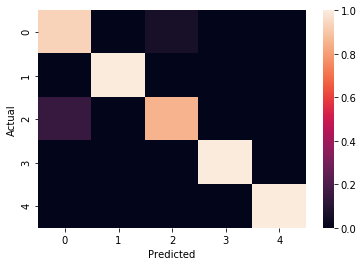

In [19]:
from pandas_ml import ConfusionMatrix

ConfMatrix=ConfusionMatrix(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

ConfMatrix.plot(normalized=True,backend='seaborn')

In [20]:
ConfMatrix.print_stats()

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted   0   1   2   3   4  __all__
Actual                                
0          57   0   4   0   0       61
1           0  71   0   0   0       71
2           7   0  41   0   0       48
3           0   0   0  43   0       43
4           0   0   0   0  56       56
__all__    64  71  45  43  56      279


Overall Statistics:

Accuracy: 0.9605734767025089
95% CI: (0.9305513739401573, 0.9801568421799388)
No Information Rate: ToDo
P-Value [Acc > NIR]: 3.4059657807937456e-142
Kappa: 0.9503003999935223
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0        1  ...         3         4
Population                                   279      279  ...       279       279
P: Condition positive                         61       71  ...        43        56
N: Condition negative                        218      208  ...       236       223
Test outcome positive                         64       71  ...        43        56
Test o

Confusion Matrix:
 [[57  0  4  0  0]
 [ 0 71  0  0  0]
 [ 7  0 41  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 56]]


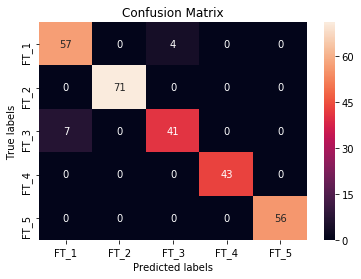

In [21]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);